# Test Julia sim with binder

In [1]:
versioninfo()

Julia Version 1.6.7
Commit 3b76b25b64* (2022-07-19 15:11 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) Gold 6248 CPU @ 2.50GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, cascadelake)
Environment:
  JULIA_NUM_THREADS = 20


In [2]:
using Pkg; Pkg.status()

      Status `/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/sim/metabolism_unit_models/FINAL_CLEAN/MAIN/Jay14aug23/Project.toml`
  [336ed68f] CSV
  [a93c6f00] DataFrames
  [2b5f629d] DiffEqBase
  [459566f4] DiffEqCallbacks
  [0c46a032] DifferentialEquations
  [5789e2e9] FileIO
  [f6369f11] ForwardDiff
  [7073ff75] IJulia
  [033835bb] JLD2
  [682c06a0] JSON
  [b2108857] Lux
  [961ee093] ModelingToolkit
  [1dea7af3] OrdinaryDiffEq
  [65888b18] ParameterizedFunctions
  [91a5bcdd] Plots
  [731186ca] RecursiveArrayTools
  [0bca4576] SciMLBase
  [90137ffa] StaticArrays
  [2913bbd2] StatsBase
  [f3b207a7] StatsPlots
  [0c5d862f] Symbolics
  [e88e6eb3] Zygote


In [ ]:
import Pkg; Pkg.add("BenchmarkTools")

In [9]:
using BenchmarkTools

# test performance

M = rand(2^10, 2^10)

@btime $M * $M;

  55.403 ms (2 allocations: 8.00 MiB)


In [ ]:
Pkg.add(name="DifferentialEquations", version="7.2.0")

In [ ]:
Pkg.add(name="ModelingToolkit", version="8.11.0")

In [ ]:
Pkg.add(name="Symbolics", version="4.3.0")

In [ ]:
Pkg.add(name="Plots", version="1.31.1")

In [3]:
using DifferentialEquations  
using ModelingToolkit, Symbolics 

using Dates
using Plots

import Random
Random.seed!(357819)


MersenneTwister(357819)

In [4]:
function lorenz!(du, u, p, t)
    
    # From https://docs.sciml.ai/DiffEqDocs/stable/getting_started/#Example-2:-Solving-Systems-of-Equations
    
    du[1] = 10.0 * (u[2] - u[1])
    du[2] = u[1] * (28.0 - u[3]) - u[2]
    du[3] = u[1] * u[2] - (8 / 3) * u[3]
end

lorenz! (generic function with 1 method)

In [5]:
u0 = [1.0; 0.0; 0.0]
tspan = (0.0, 100.0)
prob = ODEProblem(lorenz!, u0, tspan)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 1300-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.003262408518896374
   0.009058077168386882
   0.01695647153663815
   0.027689960628879868
   0.041856351821061455
   0.06024041060823337
   0.08368540639551347
   0.11336498387118026
   0.14862180073662978
   0.18703976749175058
   ⋮
  98.96497153541497
  99.06972158785038
  99.15733553336672
  99.25227436435598
  99.34990050231407
  99.47329750836677
  99.56888278883171
  99.68067056500875
  99.7698930548574
  99.86396908592394
  99.9520070464327
 100.0
u: 1300-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591566959717, 0.089770627357676, 0.0001438019004555601]
 [0.9242043510496474, 0.24228916412927515, 0.0010461626

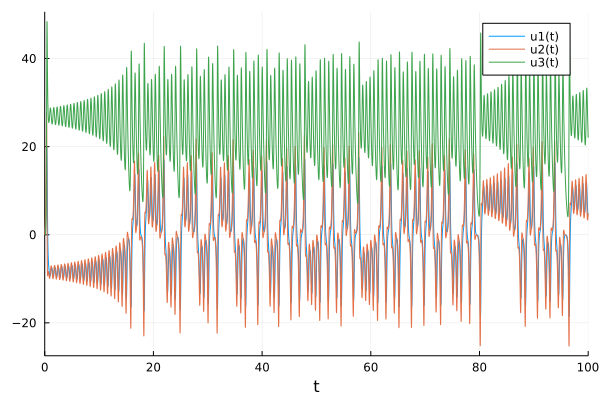

In [6]:
plot(sol, idxs = (1, 2, 3))